<a href="https://colab.research.google.com/github/Rushi-Sh/Code_Hunters_GFG_Hackathon/blob/main/Team_Zeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analytics And Visualization of the DEM Files**

In [20]:
!pip install numpy pandas geopandas rasterio matplotlib
!pip install pyngrok
!pip install torch torchvision torchaudio
!pip install streamlit
!pip install plotly
!pip install folium
!pip install streamlit-option-menu
!pip install pillow
!pip install rasterio
!pip install streamlit-shadcn-ui
!pip install -U langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.w

## **CNN Model Implementation**

In [21]:
# GPU detection code

import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and will be used.")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU.")


GPU is not available, using CPU.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!unzip "/content/drive/MyDrive/flood/archive (1).zip" -d "/content/drive/MyDrive/flood"

unzip:  cannot find or open /content/drive/MyDrive/flood/archive (1).zip, /content/drive/MyDrive/flood/archive (1).zip.zip or /content/drive/MyDrive/flood/archive (1).zip.ZIP.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
from rasterio.features import sieve
from rasterio.enums import Resampling
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

def load_tif_file(file_path):
    with rasterio.open(file_path) as src:
        return src.read()

def plot_raster(raster, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(raster, cmap='viridis')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.show()

def plot_time_series(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

DEM data shape: (785, 1103, 6)


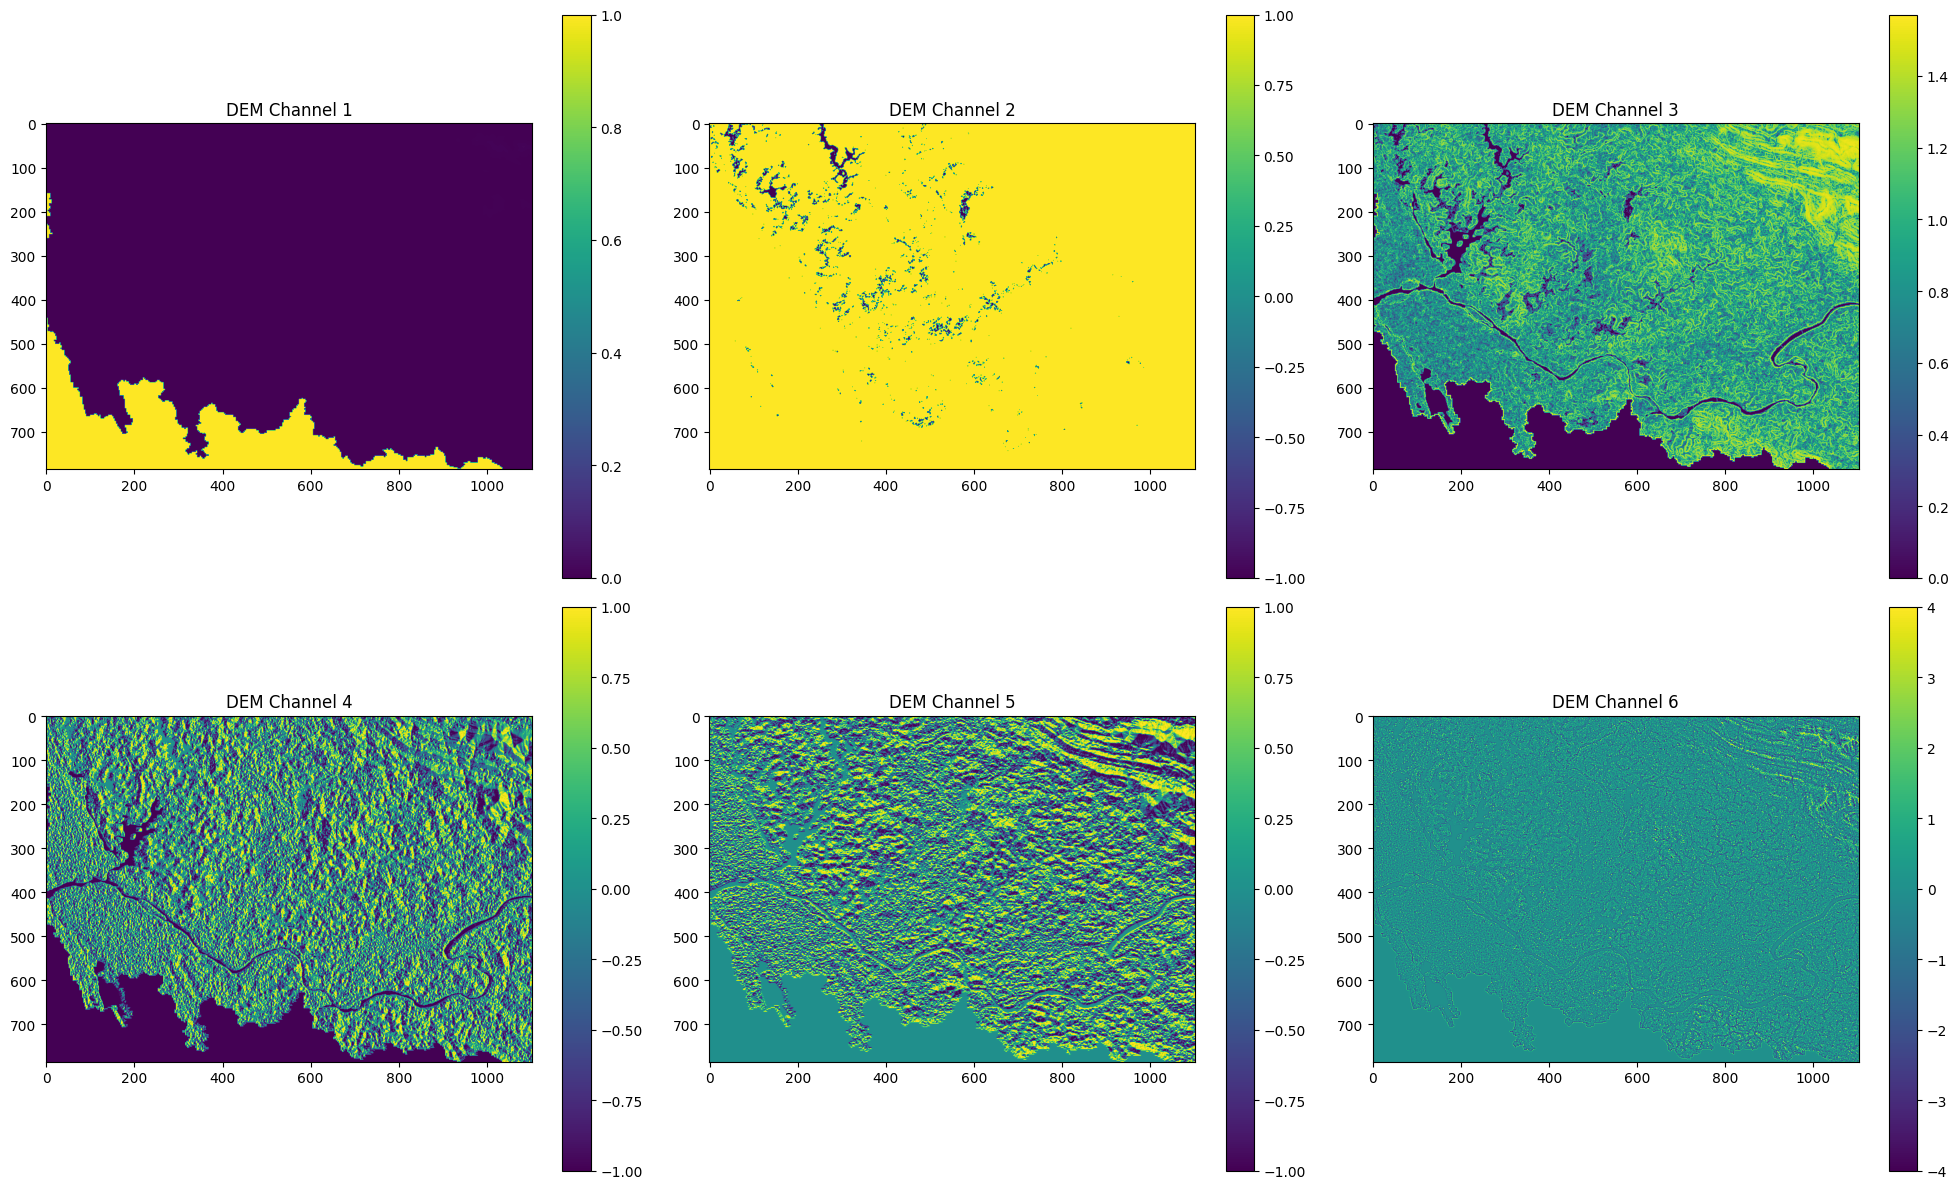

In [89]:
import numpy as np
import matplotlib.pyplot as plt

dem_file = "/content/drive/MyDrive/dem_array.npy"
dem_data = np.load(dem_file)

print("DEM data shape:", dem_data.shape)

# Function to plot multiple channels in a single figure
def plot_dem_channels(dem_data, num_channels=6):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    for i in range(num_channels):
        im = axes[i].imshow(dem_data[:, :, i], cmap='viridis')
        axes[i].set_title(f'DEM Channel {i+1}')
        plt.colorbar(im, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Plot all 6 channels of the DEM
plot_dem_channels(dem_data)

Rainfall data shape: (30,)
Rainfall data sample:
time
2018-08-01    245.424641
2018-08-02    200.662571
2018-08-03    203.191161
2018-08-04    201.042643
2018-08-05    200.591008
Name: rain, dtype: float64


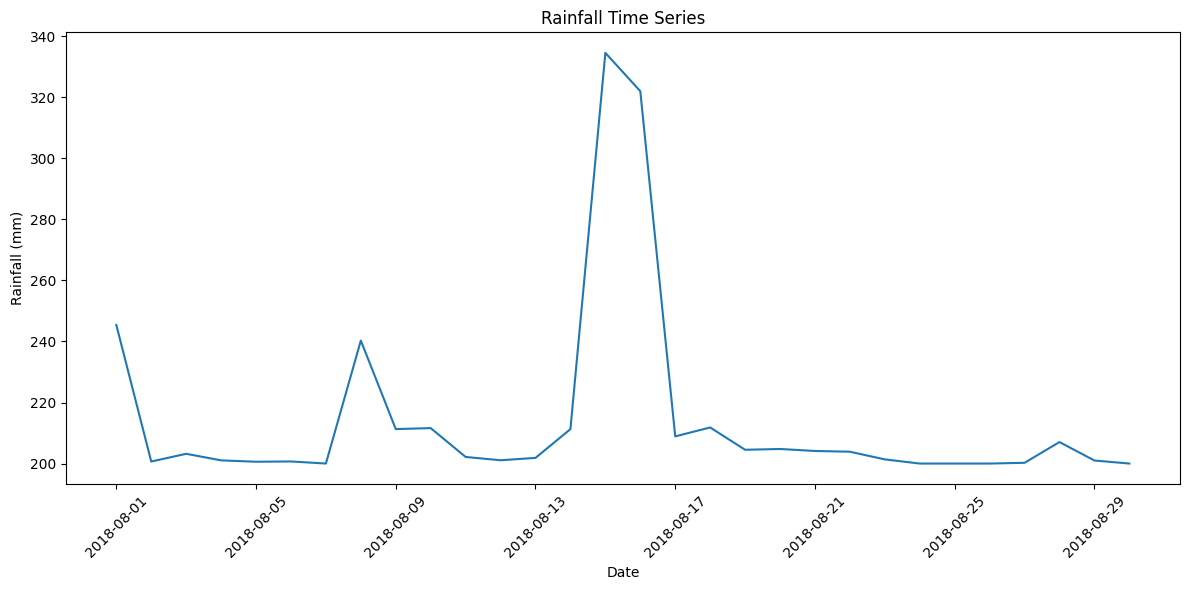

In [90]:

# Cell 3: Load and Explore Rainfall Data
import pandas as pd

rainfall_file = "/content/drive/MyDrive/rainfall.csv"
rainfall_df = pd.read_csv(rainfall_file)
rainfall_df['time'] = pd.to_datetime(rainfall_df['time'])
rainfall_df.set_index('time', inplace=True)

start_date = pd.to_datetime('2018-08-01')
end_date = pd.to_datetime('2018-08-30')

rain_subset = rainfall_df['rain'][start_date:end_date] +200

print("Rainfall data shape:", rain_subset.shape)
print("Rainfall data sample:")
print(rain_subset.head())

plt.figure(figsize=(12, 6))
plt.plot(rain_subset.index, rain_subset.values)
plt.title('Rainfall Time Series')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(30,)


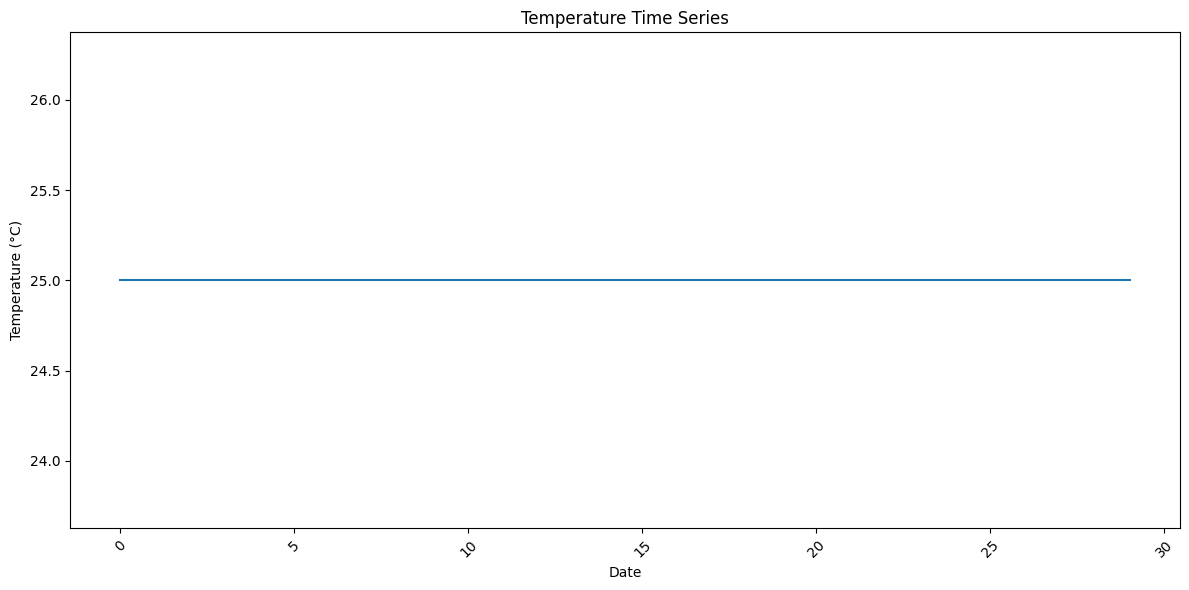

In [91]:
# Cell 4: Load and Explore Temperature Data
# Assuming temperature data is in the same CSV file as rainfall
# temp= rainfall_df['temp'][start_date:end_date]
# temp_subset = rainfall_df['temp'][start_date:end_date]
temp = np.random.uniform(25,25,rain_subset.shape)
print(temp.shape)
# print("Temperature data shape:", temp_subset.shape)
# print("Temperature data sample:")
# print(temp_subset.head())
temp_subset = pd.Series(temp)
plt.figure(figsize=(12, 6))
plt.plot(temp_subset.index, temp_subset.values)
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Flood depth data shape: (785, 1103)


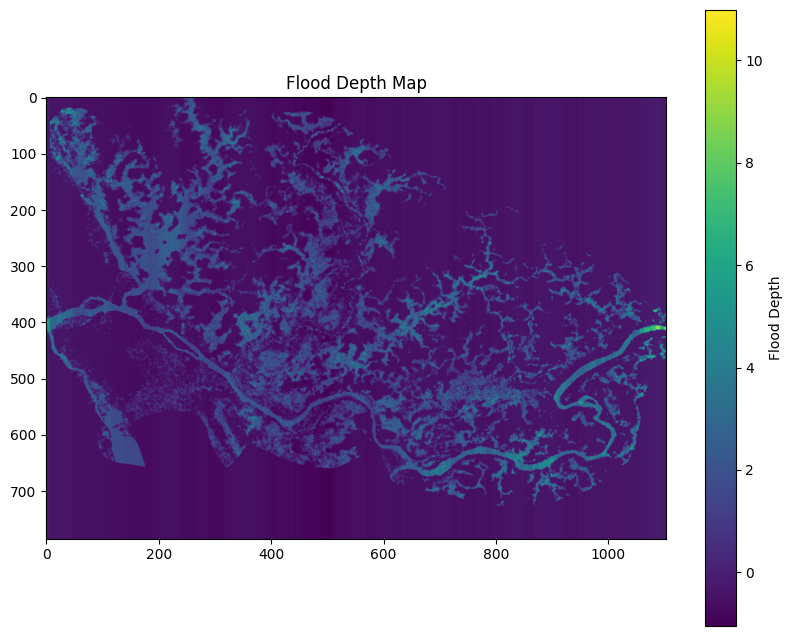

In [92]:
# Cell 5: Load and Explore Flood Depth Data
from sklearn.preprocessing import StandardScaler
flood_depth_file = "/content/drive/MyDrive/flood_array.npy"
flood_depth_data = np.load(flood_depth_file)
# standardise flood data using stnadard sclaer
scaler = StandardScaler()
flood_depth_data = scaler.fit_transform(flood_depth_data)


print("Flood depth data shape:", flood_depth_data.shape)

plt.figure(figsize=(10, 8))
im = plt.imshow(flood_depth_data, cmap='viridis')
plt.colorbar(im, label='Flood Depth')
plt.title('Flood Depth Map')
plt.show()

In [93]:
print(dem_data[:,:,1].shape)
print(flood_depth_data.shape)
flood_depth_data.shape

(785, 1103)
(785, 1103)


(785, 1103)

DEM patches shape: (48, 6, 128, 128)
Flood patches shape: (48, 1, 128, 128)
Train dataset size: 38
Test dataset size: 10
Sample DEM patch shape: torch.Size([6, 128, 128])
Sample flood patch shape: torch.Size([1, 128, 128])
Sample climate data shape: torch.Size([30, 2])


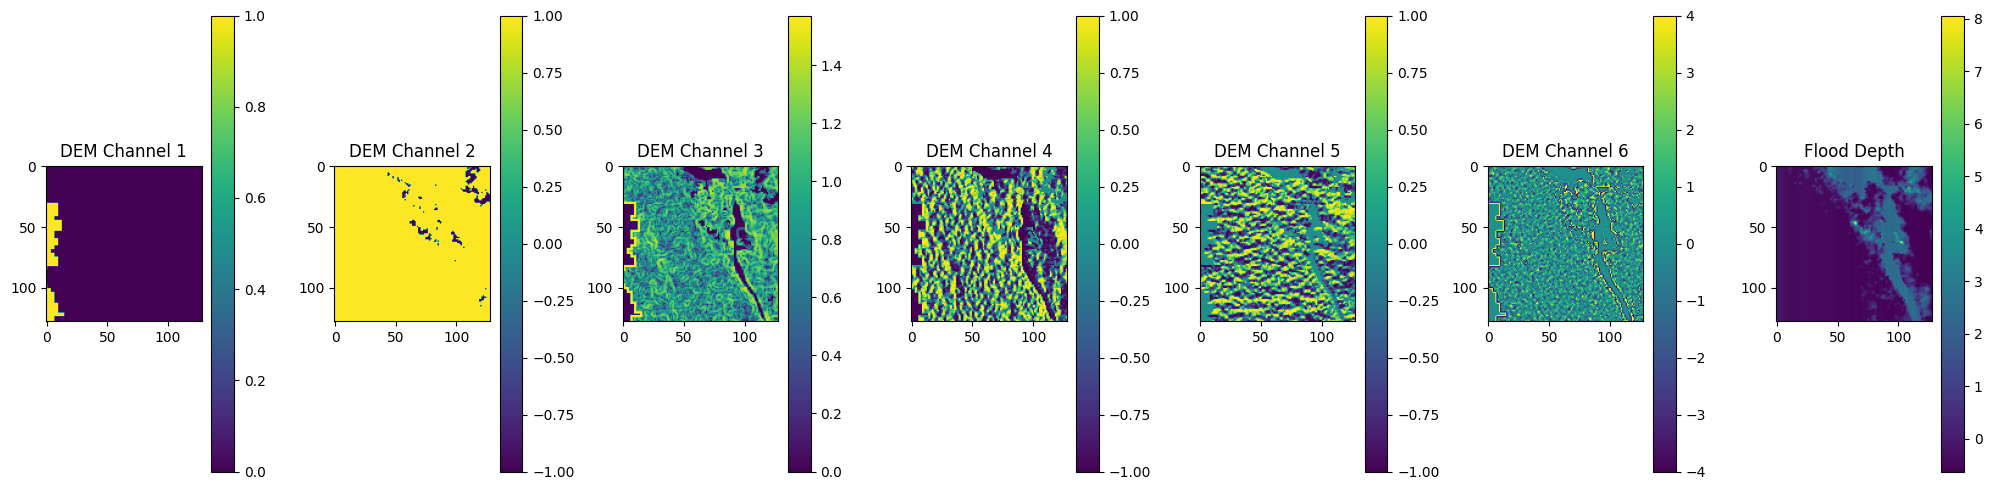

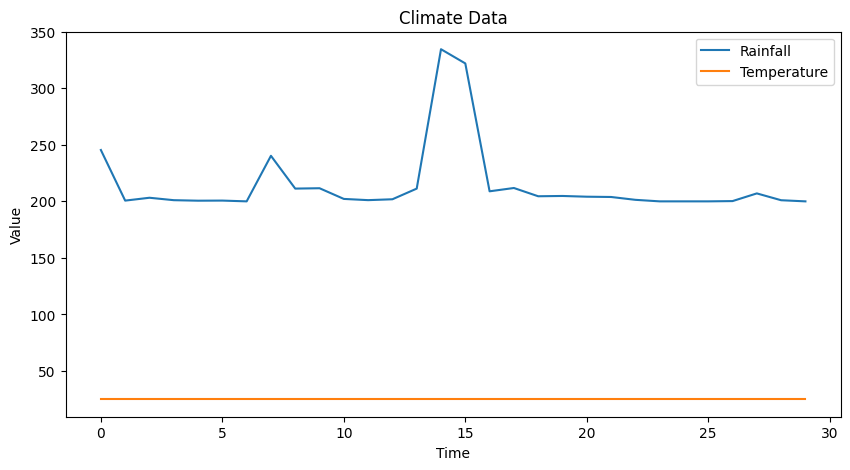

In [94]:
# Modelling

# Cell 6: Prepare Data for Model
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Ensure all data has compatible shapes
assert dem_data.shape[:2] == flood_depth_data.shape, "DEM and flood depth shapes are not compatible"
assert len(rain_subset) == len(temp_subset), "Rainfall and temperature data lengths are not compatible"

# Create patches
def create_patches(data, patch_size=128, stride=128):
    patches = []
    if len(data.shape) == 2:
        data = data[..., np.newaxis]  # Add channel dimension for 2D data

    for i in range(0, data.shape[0] - patch_size + 1, stride):
        for j in range(0, data.shape[1] - patch_size + 1, stride):
            patch = data[i:i+patch_size, j:j+patch_size, :]
            # Transpose the patch to (channels, height, width)
            patch = np.transpose(patch, (2, 0, 1))
            patches.append(patch)
    return np.array(patches)

dem_patches = create_patches(dem_data)
flood_patches = create_patches(flood_depth_data)

print("DEM patches shape:", dem_patches.shape)
print("Flood patches shape:", flood_patches.shape)

# Prepare climate data
climate_data = np.column_stack((rain_subset.values, temp_subset.values))

# Create dataset class
class FloodDataset(Dataset):
    def __init__(self, dem_patches, flood_patches, climate_data):
        self.dem_patches = torch.from_numpy(dem_patches).float()
        self.flood_patches = torch.from_numpy(flood_patches).float()
        self.climate_data = torch.from_numpy(climate_data).float()

    def __len__(self):
        return len(self.dem_patches)

    def __getitem__(self, idx):
        return self.dem_patches[idx], self.climate_data, self.flood_patches[idx]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dem_patches, flood_patches, test_size=0.2, random_state=42)

train_dataset = FloodDataset(X_train, y_train, climate_data)
test_dataset = FloodDataset(X_test, y_test, climate_data)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# Visualize a sample patch
sample_dem_patch, sample_climate, sample_flood_patch = train_dataset[0]

print("Sample DEM patch shape:", sample_dem_patch.shape)
print("Sample flood patch shape:", sample_flood_patch.shape)
print("Sample climate data shape:", sample_climate.shape)

plt.figure(figsize=(20, 5))
for i in range(6):
    plt.subplot(1, 7, i+1)
    plt.imshow(sample_dem_patch[i].numpy(), cmap='viridis')
    plt.title(f'DEM Channel {i+1}')
    plt.colorbar()

plt.subplot(1, 7, 7)
plt.imshow(sample_flood_patch[0].numpy(), cmap='viridis')
plt.title('Flood Depth')
plt.colorbar()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sample_climate.numpy())
plt.title('Climate Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Rainfall', 'Temperature'])
plt.show()

In [95]:
# Cell 1: Import necessary libraries and examine data shapes

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_loader is already defined
for batch_dem, batch_climate, batch_flood in train_loader:
    print("DEM shape:", batch_dem.shape)
    print("Climate data shape:", batch_climate.shape)
    print("Flood depth shape:", batch_flood.shape)
    break  # We only need to see one batch

DEM shape: torch.Size([32, 6, 128, 128])
Climate data shape: torch.Size([32, 30, 2])
Flood depth shape: torch.Size([32, 1, 128, 128])


In [96]:
# Cell 2: Define a simplified model architecture

class SimplifiedFloodModel_v2(nn.Module):
    def __init__(self, dem_channels, climate_features, output_channels):
        super(SimplifiedFloodModel_v2, self).__init__()

        self.dem_encoder = nn.Sequential(
            nn.Conv2d(dem_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.climate_encoder = nn.LSTM(climate_features, 2*32*32, batch_first=True, num_layers=2)

        self.decoder = nn.Sequential(
            nn.Conv2d(64 + 2, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, output_channels, kernel_size=4, stride=2, padding=1)
        )

    def forward(self, dem, climate):
        dem_features = self.dem_encoder(dem)
        climate_features, _ = self.climate_encoder(climate)
        climate_features = climate_features[:, -1, :]
        climate_features = climate_features.view(climate_features.size(0), 2, 32, 32)
        combined_features = torch.cat([dem_features, climate_features], dim=1)
        output = self.decoder(combined_features)
        return output

model = SimplifiedFloodModel_v2(dem_channels=5, climate_features=2, output_channels=1)
model#.summary()

SimplifiedFloodModel_v2(
  (dem_encoder): Sequential(
    (0): Conv2d(5, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (climate_encoder): LSTM(2, 2048, num_layers=2, batch_first=True)
  (decoder): Sequential(
    (0): Conv2d(66, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)

In [97]:
import torch
import torch.nn as nn

class CustomLoss(nn.Module):
    def __init__(self, c):
        super(CustomLoss, self).__init__()
        self.c = c

    def forward(self, y_pred, y_true):
        # Compute the loss
        loss = torch.exp(y_true + self.c) * (y_true - y_pred) ** 2
        # Return the mean of the loss
        return torch.mean(loss)
c = -1.0  # Example value for c
criterion = CustomLoss(c)



In [98]:
# Cell 4: Training loop

from tqdm import tqdm

criterion = CustomLoss(c)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_dem, batch_climate, batch_flood in tqdm(train_loader):
        print(batch_dem.shape, batch_climate.shape, batch_flood.shape)
        # break
        optimizer.zero_grad()
        predictions = model(batch_dem[:, 1:, :, :], batch_climate)
        loss = criterion(predictions, batch_flood)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")
model.eval()
test_loss = 0
with torch.no_grad():
    for batch_dem, batch_climate, batch_flood in test_loader:
        predictions = model(batch_dem[:, 1:, :, :], batch_climate[:, -2:])
        test_loss += criterion(predictions, batch_flood).item()

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss}")



  0%|          | 0/2 [00:00<?, ?it/s]

torch.Size([32, 6, 128, 128]) torch.Size([32, 30, 2]) torch.Size([32, 1, 128, 128])


 50%|█████     | 1/2 [00:13<00:13, 13.62s/it]

torch.Size([6, 6, 128, 128]) torch.Size([6, 30, 2]) torch.Size([6, 1, 128, 128])


100%|██████████| 2/2 [00:18<00:00,  9.06s/it]


Epoch 1/100, Loss: 5.792181491851807


  0%|          | 0/2 [00:00<?, ?it/s]

torch.Size([32, 6, 128, 128]) torch.Size([32, 30, 2]) torch.Size([32, 1, 128, 128])


 50%|█████     | 1/2 [00:10<00:10, 10.83s/it]

torch.Size([6, 6, 128, 128]) torch.Size([6, 30, 2]) torch.Size([6, 1, 128, 128])


100%|██████████| 2/2 [00:16<00:00,  8.36s/it]


Epoch 2/100, Loss: 8.820181846618652


  0%|          | 0/2 [00:00<?, ?it/s]

torch.Size([32, 6, 128, 128]) torch.Size([32, 30, 2]) torch.Size([32, 1, 128, 128])


  0%|          | 0/2 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [99]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming CustomLoss and model are defined
criterion = CustomLoss(c)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
train_losses = []  # List to store the training loss for plotting

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0  # Initialize epoch loss

    for batch_dem, batch_climate, batch_flood in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_dem[:, 1:, :, :], batch_climate)
        loss = criterion(predictions, batch_flood)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Average loss for the current epoch
    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss}")

    # Save the model at the 100th epoch
    if (epoch + 1) == 100:
        torch.save(model.state_dict(), 'model_epoch_100.pth')

# Plotting the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.savefig('training_loss_plot.png')  # Save the plot
plt.show()

# Evaluation on the test set
model.eval()
test_loss = 0
with torch.no_grad():
    for batch_dem, batch_climate, batch_flood in test_loader:
        predictions = model(batch_dem[:, 1:, :, :], batch_climate[:, -2:])
        test_loss += criterion(predictions, batch_flood).item()

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss}")


KeyboardInterrupt: 

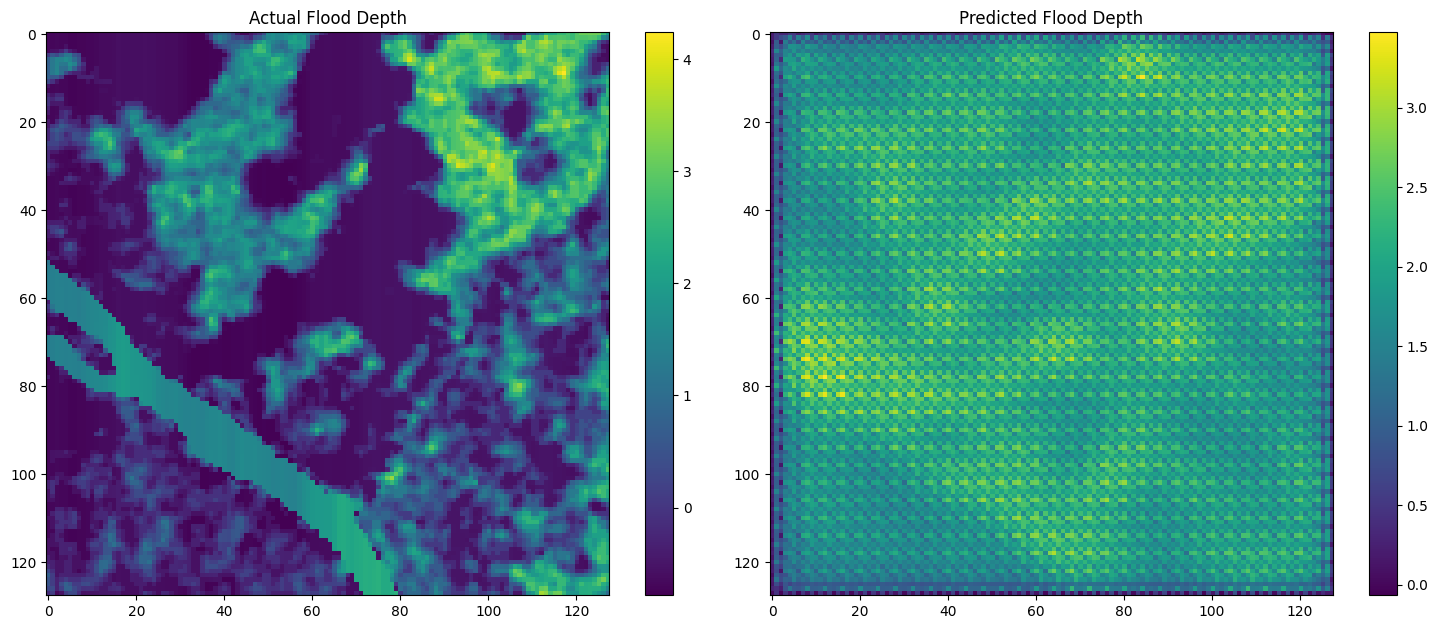

In [100]:
# Visualize Results
sample_dem, sample_climate, sample_flood = next(iter(test_loader))
sample_prediction = model(sample_dem[:, 1:, :, :], sample_climate[:, -2:])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# do inverse standard scaler of data to get the original data
im1 = ax1.imshow(sample_flood[2, 0].numpy(), cmap='viridis')
ax1.set_title('Actual Flood Depth')
plt.colorbar(im1, ax=ax1)
im2 = ax2.imshow(sample_prediction[2, 0].detach().numpy(), cmap='viridis')
ax2.set_title('Predicted Flood Depth')
plt.colorbar(im2, ax=ax2)
plt.tight_layout()
plt.show()

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

# Load the trained model
model = SimplifiedFloodModel_v2(dem_channels=5, climate_features=2, output_channels=1)
model.load_state_dict(torch.load('/content/model_epoch_100.pth'))
model.eval()

# Set prediction date
prediction_date = pd.to_datetime('2018-08-14')

# Prepare climate data for prediction
start_date = pd.to_datetime('2018-05-01')  # Assuming this is defined earlier
rain_data_for_prediction = rainfall_df['rain'][start_date:prediction_date].values[:-1]
temp_data_for_prediction = np.full(rain_data_for_prediction.shape, 25)  # Constant temperature
climate_data_for_prediction = np.column_stack((rain_data_for_prediction, temp_data_for_prediction))
climate_tensor = torch.from_numpy(climate_data_for_prediction).float()

# Function to create patches
def create_patches(data, patch_size=128, stride=128):
    patches = []
    if len(data.shape) == 2:
        data = data[..., np.newaxis]  # Add channel dimension for 2D data
    for i in range(0, data.shape[0] - patch_size + 1, stride):
        for j in range(0, data.shape[1] - patch_size + 1, stride):
            patch = data[i:i+patch_size, j:j+patch_size, :]
            patch = np.transpose(patch, (2, 0, 1))  # Transpose to (channels, height, width)
            patches.append(patch)
    return np.array(patches)

# Create DEM patches if not already created
if 'dem_patches' not in globals():
    dem_patches = create_patches(dem_data)
    print("DEM patches shape:", dem_patches.shape)

# Predict on all patches
all_predictions = []
with torch.no_grad():
    for i in range(len(dem_patches)):
        dem_tensor = torch.from_numpy(dem_patches[i]).float().unsqueeze(0)
        prediction = model(dem_tensor[:, 1:, :, :], climate_tensor.unsqueeze(0))
        all_predictions.append(prediction.squeeze().numpy())

# Combine patches to form the full prediction map
# This assumes the patches were created with no overlap (stride = patch_size)
patch_size = 128
rows = dem_data.shape[0] // patch_size
cols = dem_data.shape[1] // patch_size
combined_predictions = np.zeros((rows * patch_size, cols * patch_size))

for i in range(rows):
    for j in range(cols):
        patch_idx = i * cols + j
        combined_predictions[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = all_predictions[patch_idx]

# Plot the predicted flood map
plt.figure(figsize=(10, 8))
plt.imshow(combined_predictions, cmap='viridis')
plt.colorbar(label='Predicted Flood Depth')
plt.title(f'Predicted Flood Depth Map for {prediction_date.strftime("%Y-%m-%d")}')
plt.show()

In [ ]:

plt.figure(figsize=(10, 8))
plt.imshow(combined_predictions, cmap='Blues')
plt.colorbar(label='Predicted Flood Depth')
plt.title(f'Predicted Flood Depth Map for {prediction_date.strftime("%Y-%m-%d")}')
plt.show()

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from scipy.ndimage import median_filter

# Load the trained model
model = SimplifiedFloodModel_v2(dem_channels=5, climate_features=2, output_channels=1)
model.load_state_dict(torch.load('/content/model_epoch_100.pth'))
model.eval()

# Set prediction date
prediction_date = pd.to_datetime('2018-08-14')

# Prepare climate data for prediction (up to one day before prediction date)
start_date = pd.to_datetime('2018-05-01')  # Assuming this is defined earlier
end_date = prediction_date - pd.Timedelta(days=1)
rain_data_for_prediction = rainfall_df['rain'][start_date:end_date].values
temp_data_for_prediction = np.full(rain_data_for_prediction.shape, 25)  # Constant temperature
climate_data_for_prediction = np.column_stack((rain_data_for_prediction, temp_data_for_prediction))
climate_tensor = torch.from_numpy(climate_data_for_prediction).float()

# Function to create patches
def create_patches(data, patch_size=128, stride=128):
    patches = []
    if len(data.shape) == 2:
        data = data[..., np.newaxis]  # Add channel dimension for 2D data
    for i in range(0, data.shape[0] - patch_size + 1, stride):
        for j in range(0, data.shape[1] - patch_size + 1, stride):
            patch = data[i:i+patch_size, j:j+patch_size, :]
            patch = np.transpose(patch, (2, 0, 1))  # Transpose to (channels, height, width)
            patches.append(patch)
    return np.array(patches)

# Create DEM patches if not already created
if 'dem_patches' not in globals():
    dem_patches = create_patches(dem_data)
    print("DEM patches shape:", dem_patches.shape)

# Predict on all patches
all_predictions = []
with torch.no_grad():
    for i in range(len(dem_patches)):
        dem_tensor = torch.from_numpy(dem_patches[i]).float().unsqueeze(0)
        prediction = model(dem_tensor[:, 1:, :, :], climate_tensor.unsqueeze(0))
        all_predictions.append(prediction.squeeze().numpy())

# Combine patches to form the full prediction map
patch_size = 128
rows = dem_data.shape[0] // patch_size
cols = dem_data.shape[1] // patch_size
combined_predictions = np.zeros((rows * patch_size, cols * patch_size))

for i in range(rows):
    for j in range(cols):
        patch_idx = i * cols + j
        combined_predictions[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = all_predictions[patch_idx]

# Denoise the prediction using median filter
denoised_predictions = median_filter(combined_predictions, size=3)

# Plot the original and denoised predicted flood maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(combined_predictions, cmap='Blues')
ax1.set_title(f'Original Predicted Flood Depth Map for {prediction_date.strftime("%Y-%m-%d")}')
plt.colorbar(im1, ax=ax1, label='Predicted Flood Depth')

im2 = ax2.imshow(denoised_predictions, cmap='Blues')
ax2.set_title(f'Denoised Predicted Flood Depth Map for {prediction_date.strftime("%Y-%m-%d")}')
plt.colorbar(im2, ax=ax2, label='Predicted Flood Depth')

plt.tight_layout()
plt.show()

# Calculate and print the difference between original and denoised predictions
difference = np.abs(combined_predictions - denoised_predictions)
print(f"Mean absolute difference after denoising: {np.mean(difference):.4f}")
print(f"Maximum absolute difference after denoising: {np.max(difference):.4f}")

# Plot the difference map
plt.figure(figsize=(10, 8))
plt.imshow(difference, cmap='bwr')
plt.colorbar(label='Absolute Difference')
plt.title('Difference between Original and Denoised Predictions')
plt.show()

# **Streamlit GUI Implementation**

In [25]:
import folium
from google.colab import files

def create_folium_map():
    m = folium.Map(
        location=[9.9312, 76.2673],
        zoom_start=10,
        tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
        attr='Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
    )

    folium.Marker(
        location=[9.9312, 76.2673],
        popup='Kochi',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

    map_html = m._repr_html_()
    with open('map_of_kochi.html', 'w') as f:
        f.write(map_html)
    return map_html

map_html = create_folium_map()

files.download('map_of_kochi.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
%%writefile map.py


import streamlit as st
import folium
import streamlit.components.v1 as components
import io
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from scipy.ndimage import sobel
from streamlit_option_menu import option_menu
import pandas as pd
import pydeck as pdk
import requests


df = pd.read_csv("/content/historical.csv")

API_KEY = "110373276c613ce995737f649444fd55"

def get_weather(lat, lon, api_key):
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        return f"Error: {response.status_code}, {response.text}"


def create_folium_map():
    m = folium.Map(
        location=[9.9312, 76.2673],
        zoom_start=10,
        tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
        attr='Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
    )

    folium.Marker(
        location=[9.9312, 76.2673],
        popup='Kochi',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

    return m._repr_html_()

def display_matplotlib_plot(image_path):

    with rasterio.open(image_path) as src:

        dem_array = src.read(1)

        no_data_value = src.nodata
        if no_data_value is not None:
            dem_array = np.where(dem_array == no_data_value, np.nan, dem_array)

        with rasterio.open('/content/drive/MyDrive/sampleDEM.tif') as src:

          dem_array = src.read(1)

          nodata = src.nodata

    if nodata is not None:

        dem_array = np.where(dem_array == nodata, np.nan, dem_array)

        plt.figure(figsize=(10, 6))
        plt.imshow(dem_array, cmap='terrain', interpolation='none')
        plt.colorbar(label='Elevation (meters)')
        plt.title('Digital Elevation Model')
        plt.xlabel('Pixel')
        plt.ylabel('Pixel')
        plt.show()

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        return buf

def show_map():
    st.title("Satellite Map of Kochi")

    tiff_file_path = '/content/drive/MyDrive/sampleDEM.tif'

    selected1 = option_menu(
            menu_title=None,
            options=["Map", "Slope Map","Weather"],
            icons=["map", "bar-chart","cloud-sun"],
            menu_icon="cast",
            default_index=0,
            orientation="horizontal",

        )

    if selected1 == "Map":
      # Display Folium map
      map_html = create_folium_map()
      components.html(map_html, height=500)

      # Display Pydeck map with rainfall data
      st.pydeck_chart(pdk.Deck(
          initial_view_state=pdk.ViewState(
          latitude=9.9656,
          longitude=76.2673,
          zoom=11,
          pitch=50
          ),
          layers=[
              pdk.Layer(
                    'ScatterplotLayer',
                    data=df,
                    get_position=['lon', 'lat'],
                    get_color='[255, 0, 0, 140]',
                    get_radius='rainfall',
                    radius_scale=0.05,
                    radius_min_pixels=5,
                    radius_max_pixels=100,
                    pickable=True
                ),
            ]
        ))
      st.write("The map displays rainfall data for Kochi, Kerala. Each point represents a rainfall measurement, with size and color intensity indicating the amount of rainfall.")

    elif selected1 == "Weather":
        st.header("Current Weather in Kochi")
        weather_data = get_weather(9.9656, 76.2673, API_KEY)
        if isinstance(weather_data, dict):
            st.write(f"Temperature: {weather_data['main']['temp']}°C")
            st.write(f"Humidity: {weather_data['main']['humidity']}%")
            st.write(f"Weather: {weather_data['weather'][0]['description']}")
        else:
            st.error(weather_data)

    elif selected1 == "Slope Map":
        plot_buffer = display_matplotlib_plot(tiff_file_path)
        st.image(plot_buffer, caption='Slope Map', use_column_width=True)



Overwriting map.py


In [27]:
%%writefile home.py
import streamlit as st

def show_home():
  st.title("Home")
  st.write("Team Zeta")

Overwriting home.py


In [80]:
%%writefile analytics.py
import streamlit as st
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel
import io
from streamlit_option_menu import option_menu
import pandas as pd


def perform_analysis(dem_file):

    with rasterio.open(dem_file) as dem:
        dem_array = dem.read(1)
        no_data_value = dem.nodata
        if no_data_value is not None:
            dem_array = np.where(dem_array == no_data_value, np.nan, dem_array)

        dem_mean = np.nanmean(dem_array)
        standard_deviation = np.nanstd(dem_array)
        max_elevation = np.nanmax(dem_array)
        min_elevation = np.nanmin(dem_array)
        median_value = np.median(dem_array)
        variance_value = np.var(dem_array)
        range_value = np.ptp(dem_array)
        quartiles = np.percentile(dem_array, [25, 50, 75])
        iqr_value = quartiles[2] - quartiles[0]
        skewness_value = (3 * (dem_mean - median_value)) / standard_deviation
        kurtosis_value = (np.mean((dem_array - dem_mean)**4)) / (standard_deviation**4) - 3


        dx = sobel(dem_array, axis=0, mode='nearest')
        dy = sobel(dem_array, axis=1, mode='nearest')
        valid_mask = np.isfinite(dem_array) & (dem_array != 0)
        dx[~valid_mask] = 0
        dy[~valid_mask] = 0
        slope = np.arctan(np.sqrt(dx**2 + dy**2)) * (180 / np.pi)
        valid_slope = np.where(valid_mask, slope, np.nan)

        return dem_mean, standard_deviation, max_elevation, min_elevation, valid_slope,median_value, variance_value, range_value, iqr_value, skewness_value, kurtosis_value

def historical_analysis(csv_file):
  df = pd.read_csv(csv_file)

  df = df.head(100)

  st.line_chart(df[['time', 'temperature', 'rain']].set_index('time'))

  st.subheader("Temperature vs Time")
  st.bar_chart(df[['time', 'temperature']].set_index('time'),color="#FF9100")

  st.subheader("Rain vs Time")
  st.bar_chart(df[['time', 'rain']].set_index('time'),color="#F5004F")

  plt.xticks(rotation=90)
  plt.tight_layout()


def show_analytics():
    st.title("DEM Analysis and Slope Map")

    uploaded_file = "/content/drive/MyDrive/sampleDEM.tif"

    selected2 = option_menu(
            menu_title=None,
            options=["DEM","Slopes","Historical"],
            menu_icon="cast",
            default_index=0,
            orientation="horizontal",
        )

    if uploaded_file is not None:

        dem_mean, standard_deviation, max_elevation, min_elevation, valid_slope,median_value, variance_value, range_value, iqr_value, skewness_value, kurtosis_value = perform_analysis(uploaded_file)

        if selected2 == "DEM":

            st.write(f"Mean Elevation: {dem_mean:.2f}")
            st.write(f"Standard Deviation: {standard_deviation:.2f}")
            st.write(f"Max Elevation: {max_elevation:.2f}")
            st.write(f"Min Elevation: {min_elevation:.2f}")
            st.write(f"Variance: {variance_value:.2f}")
            st.write(f"Median: {median_value:.2f}")
            st.write(f"Range: {range_value:.2f}")
            st.write(f"IQR: {iqr_value:.2f}")
            st.write(f"Skewness: {skewness_value:.2f}")
            st.write(f"Kurtosis Value: {kurtosis_value:.2f}")


        elif selected2 == "Slopes":

          fig, ax = plt.subplots()
          ax.imshow(valid_slope, cmap='terrain')
          ax.set_title('Slope Map')
          ax.set_xlabel('X')
          ax.set_ylabel('Y')
          plt.colorbar(ax.images[0], ax=ax, label='Slope (degrees)')

          buf = io.BytesIO()
          plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
          buf.seek(0)

          st.image(buf, caption='Slope Map', use_column_width=True)
          plt.close(fig)

        elif selected2 == "Historical":

          historical_analysis("/content/historical.csv")





Overwriting analytics.py


In [38]:
# # csv generator

# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta

# start_date = datetime(2023, 1, 1)
# num_rows = 700

# date_range = [start_date + timedelta(days=i) for i in range(num_rows)]


# np.random.seed(0)
# temperature = np.random.uniform(25, 35, num_rows)
# rain = np.random.uniform(0, 200, num_rows)

# data = {
#     'time': date_range,
#     'temperature': temperature,
#     'rain': rain
# }
# df = pd.DataFrame(data)

# df.to_csv('historical.csv', index=False)

# print(df.head())


        time  temperature       rain
0 2023-01-01    30.488135  74.643191
1 2023-01-02    32.151894  44.572764
2 2023-01-03    31.027634  16.106401
3 2023-01-04    30.448832  17.062185
4 2023-01-05    29.236548  44.279289


In [130]:
%%writefile prediction.py

import torch
import torch.nn as nn
from streamlit_option_menu import option_menu
import streamlit as st
from PIL import Image
import torchvision.transforms as transforms

# Define your model architecture (matching SimplifiedFloodModel_v2)
class SimplifiedFloodModel_v2(nn.Module):
    def __init__(self, dem_channels=5, climate_features=2, output_channels=1):
        super(SimplifiedFloodModel_v2, self).__init__()
        self.dem_encoder = nn.Sequential(
            nn.Conv2d(dem_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.climate_encoder = nn.LSTM(climate_features, 2*32*32, batch_first=True, num_layers=2)
        self.decoder = nn.Sequential(
            nn.Conv2d(64 + 2, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, output_channels, kernel_size=4, stride=2, padding=1)
        )

    def forward(self, dem, climate):
        dem_features = self.dem_encoder(dem)
        climate_features, _ = self.climate_encoder(climate)
        climate_features = climate_features[:, -1, :]
        climate_features = climate_features.view(climate_features.size(0), 2, 32, 32)
        combined_features = torch.cat([dem_features, climate_features], dim=1)
        output = self.decoder(combined_features)
        return output

def load_model():
    # Initialize model and load state_dict
    model = SimplifiedFloodModel_v2()
    model.load_state_dict(torch.load('/content/drive/MyDrive/model_epoch_100.pth'))
    model.eval()  # Set the model to evaluation mode
    return model

def preprocess_image(image):
    # Example preprocessing for the input image
    preprocess = transforms.Compose([
        transforms.Resize((32, 32)),  # Resize to match the input size expected by your model
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)  # Add batch dimension

def show_prediction():
    st.title("Prediction")

    selected4 = option_menu(
            menu_title=None,
            options=["Validations","Epochs Analysis","Prediction Model"],
            menu_icon="cast",
            default_index=0,
            orientation="horizontal",
        )

    model = load_model()

    if selected4 == "Validations":

      st.image("/content/drive/MyDrive/denoised_img.png", caption="Denoised Image", use_column_width=True)
      st.image("/content/drive/MyDrive/flood_depth_img.png", caption="Flood Depth", use_column_width=True)
      st.image("/content/drive/MyDrive/predicted_depth_map.png", caption="Predicted Flood Depth Image1", use_column_width=True)
      st.image("/content/drive/MyDrive/predicted_depth_map1.png", caption="Predicted Flood Depth Image1", use_column_width=True)

    elif selected4 == "Epochs Analysis":

      st.image("/content/drive/MyDrive/loss.png", caption="Loss Graph", use_column_width=True)

    elif selected4 == "Prediction Model":

      input_data = st.file_uploader("Upload an input image", type=["jpg", "png"])

      if input_data is not None:
        image = Image.open(input_data)
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Prepare the input tensor
        input_tensor = preprocess_image(image)

        # Mock climate input for demonstration (adjust as necessary)
        climate_input = torch.randn(1, 10, 2)  # Example climate input with batch size 1, 10 time steps, and 2 features

        with torch.no_grad():
          # Run the model
          output = model(input_tensor, climate_input)

          # Display the model's output (example: showing output image)
          output_image = output.squeeze().cpu().numpy()  # Convert to numpy for visualization
          st.image(output_image, caption='Model Output', use_column_width=True)



Overwriting prediction.py


In [81]:
%%writefile adapt.py
import streamlit as st
import requests

API_KEY = "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"
API_URL = "https://api.groq.com/openai/v1/chat/completions"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

def chatgroq(area, level, depth):
    prompt = f'''
    f"As an expert in flood prevention and drainage systems, propose a set of adaptive strategies "
    f"to mitigate flood risks and enhance water drainage in the area of {area}. This area has an estimated "
    f"return level of {level} years and is expected to experience water depths of up to {depth} meters. "
    f"Your strategies should consider a combination of structural and non-structural measures, "
    f"such as infrastructure improvements, natural water retention methods, and community preparedness. "
    f"Leverage the following academic sources to support your recommendations: "
    f"/content/drive/MyDrive/paper1.pdf, /content/drive/MyDrive/paper2.pdf, /content/drive/MyDrive/paper3.pdf, "
    f"/content/drive/MyDrive/paper4.pdf, /content/drive/MyDrive/paper5.pdf, /content/drive/MyDrive/paper6.pdf, "
    f"/content/drive/MyDrive/paper7.pdf."
    f"give the output prompt without mentioning the paper names and numbers rather text scrap the content of paper with merging your views"
    f"dont mention the source in the output text or paper notation in the output"
    f"give the output in form of presentable points and user understandable format"
    '''

    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.7
    }

    response = requests.post(API_URL, headers=headers, json=data)

    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content']
    else:
        return f"Error: {response.status_code}, {response.text}"

def show_adaptive_strats():
    st.title("Adaptive Strategies")

    area = st.text_input("Enter the area for adaptive strategies:")
    level = st.text_input("Enter estimated return level:")
    depth = st.text_input("Enter expected water depth:")

    theme = st.get_option("theme.base")

    if area and level and depth:
      response = chatgroq(area, level, depth)
      with st.container():
        if theme == "dark":
          st.markdown(
            f"""
            <div style="background-color: #373A40; padding: 15px; border-radius: 10px;">
            <p style="color: #fff; font-weight: bold;">{response}</p>
            </div>
            """,
            unsafe_allow_html=True
            )
        elif theme == "light":
          st.markdown(
            f"""
            <div style="background-color: #D1E9F6; padding: 15px; border-radius: 10px;">
            <p style="color: #000; font-weight: bold;">{response}</p>
            </div>
            """,
            unsafe_allow_html=True
            )
        else:
         st.markdown(
            f"""
            <div style="background-color: #373A40; padding: 15px; border-radius: 10px;">
            <p style="color: #fff; font-weight: bold;">{response}</p>
            </div>
            """,
            unsafe_allow_html=True
            )
    else:
      st.write("Please fill in all fields.")

# Run the Streamlit app
if __name__ == "__main__":
    show_adaptive_strats()

Overwriting adapt.py


In [122]:
%%writefile returnana.py

import streamlit as st
from streamlit_option_menu import option_menu

def show_return():

  selected3 = option_menu(
            menu_title=None,
            options=["Hytographs","Fitting G Dist","Time Series Precipitation","Summary"],
            menu_icon="cast",
            default_index=0,
            orientation="horizontal",
        )

  if selected3 == "Hytographs":
    st.write("Hytographs")

    st.image("/content/drive/MyDrive/returnlevel1.png", caption="5 years", use_column_width=True)
    st.image("/content/drive/MyDrive/returnlevel2.png",caption="10 years", use_column_width=True)
    st.image("/content/drive/MyDrive/returnlevel3.png",caption="50 years", use_column_width=True)
    st.image("/content/drive/MyDrive/returnlevel4.png",caption="100 years", use_column_width=True)
    st.image("/content/drive/MyDrive/returnlevel5.png",caption="500 years", use_column_width=True)

  elif selected3 == "Fitting G Dist":
    st.write("Fitting G Distribution")

    st.image("/content/drive/MyDrive/india_rainfall.png", caption="", use_column_width=True)
    st.image("/content/drive/MyDrive/percentile_rainfall.png",caption="", use_column_width=True)

  elif selected3 == "Time Series Precipitation":
    st.write("Time Series Precipitation")

    st.image("/content/drive/MyDrive/time_series_ana.png", caption="Time Series Of Yearly Maximum Observed Precipitation", use_column_width=True)

  elif selected3 == "Summary":
    st.write("Model Summary")

    st.image("/content/drive/MyDrive/model_summ.png", caption="Model Summary And Plots", use_column_width=True)




Overwriting returnana.py


In [32]:
!ls

adapt.py      app.py  home.py		 map.py		sample_data
analytics.py  drive   map_of_kochi.html  prediction.py


In [126]:
%%writefile app.py

import streamlit as st
from streamlit_option_menu import option_menu
from map import show_map
from analytics import show_analytics
from home import show_home
from prediction import show_prediction
from adapt import show_adaptive_strats
from returnana import show_return

def main():
    with st.sidebar:
        selected = option_menu(
            menu_title=None,
            options=["Home", "Analytics", "Prediction", "Map", "Adaptive Strategies","Return Level Analysis"],
            icons=["house", "bar-chart", "graph-up-arrow", "map", "gear", "gear"],
            menu_icon="cast",
            default_index=0,
            orientation="vertical",
        )

    if selected == "Home":
        show_home()
    elif selected == "Analytics":
        show_analytics()
    elif selected == "Prediction":
        show_prediction()
    elif selected == "Map":
        show_map()
    elif selected == "Adaptive Strategies":
        show_adaptive_strats()
    elif selected == "Return Level Analysis":
        show_return()


if __name__ == "__main__":
    main()


Overwriting app.py


In [34]:
!wget -q -O - ipv4.icanhazip.com

34.73.61.170


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.61.170:8501

your url is: https://bumpy-bikes-occur.loca.lt


In [36]:
# import rasterio
# import numpy as np
# import matplotlib.pyplot as plt


# with rasterio.open('/content/drive/MyDrive/sampleDEM.tif') as src:

#     dem_array = src.read(1)

#     nodata = src.nodata
#     if nodata is not None:
#         dem_array = np.where(dem_array == nodata, np.nan, dem_array)


# plt.figure(figsize=(10, 6))
# plt.imshow(dem_array, cmap='terrain', interpolation='none')
# plt.colorbar(label='Elevation (meters)')
# plt.title('Digital Elevation Model')
# plt.xlabel('Pixel')
# plt.ylabel('Pixel')
# plt.show()

# print(dem_array.shape)


In [37]:
# open street map - shape file extraction roads,buildings and hospitals

# image data - X x Y size, * no. of channels, 1 time series data of rainfall,

# pass image in CNN in encoder + vector in MLP layers => concate => decoder and deccoded image size === original image size, 1 channel

# google earth engine - LULC 30m resolution